In [1]:
from numpy import array

In [2]:
anisotropy_row = array([0.236, 0.231, 0.216, 0.209, 0.180, 0.134, 0.084, 0.081, 0.082, 0.066, 0.0675])
arp23_concentration_row = array([3405, 1703, 851, 426, 213, 106, 53, 27, 13, 7, 0]) / 1000.0

In [3]:
%matplotlib inline
from matplotlib.pyplot import subplots

In [4]:
from scipy.optimize import curve_fit
from numpy import sqrt

In [5]:
def dna_anisotropy(arp23_concentration, dissociation_constant, min_anisotropy, max_anisotropy):
    anisotropy = min_anisotropy + 0.5 * (max_anisotropy - min_anisotropy) * (dissociation_constant + arp23_concentration + 0.010 - 
                                       sqrt((dissociation_constant + arp23_concentration + 0.010)**2 - 
                                            4 * arp23_concentration * 0.010)) / 0.010
    return anisotropy

In [6]:
p2opt, p2cov = curve_fit(dna_anisotropy, arp23_concentration_row, anisotropy_row, p0 = [0.5, 0.07, 0.2])

Text(0.5, 0, 'Arp2/3 complex ($\\mu$M)')

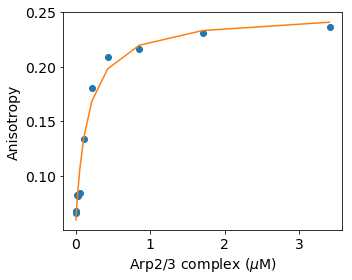

In [7]:
figure_handle, axes_handle = subplots()
figure_handle.set_figwidth(5)
axes_handle.plot(arp23_concentration_row, anisotropy_row, 'o')
axes_handle.plot(arp23_concentration_row, dna_anisotropy(arp23_concentration_row, *p2opt))
axes_handle.tick_params(labelsize = 14)
axes_handle.set_ylabel(r'Anisotropy', fontsize = 14)
axes_handle.set_xlabel(r'Arp2/3 complex ($\mu$M)', fontsize = 14)

In [8]:
from numpy import diag
print(p2opt)
print(sqrt(diag(p2cov)))

[0.15432107 0.05952948 0.24875828]
[0.03495688 0.00675544 0.00886399]
